# Simple case


 In this part is studied a simple simulation in comparison to other existing results / codes (Elmag and Taylor 2011 (fig. 1 and 2)):
* mono-energetic source (Emax=100TeV, z=0.13)
* EGMF (turbulent magnetic field): 3E-16 Gauss, L_B= 1 Mpc
* EBL model: Franceschini

$$ 
   10^{-17} \textrm{G} \leq B \leq 10^{-9} \textrm{G} 
$$


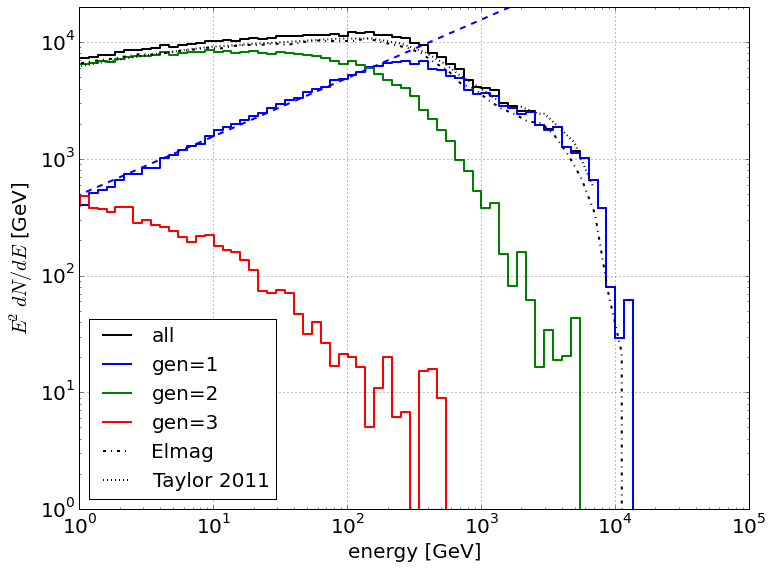

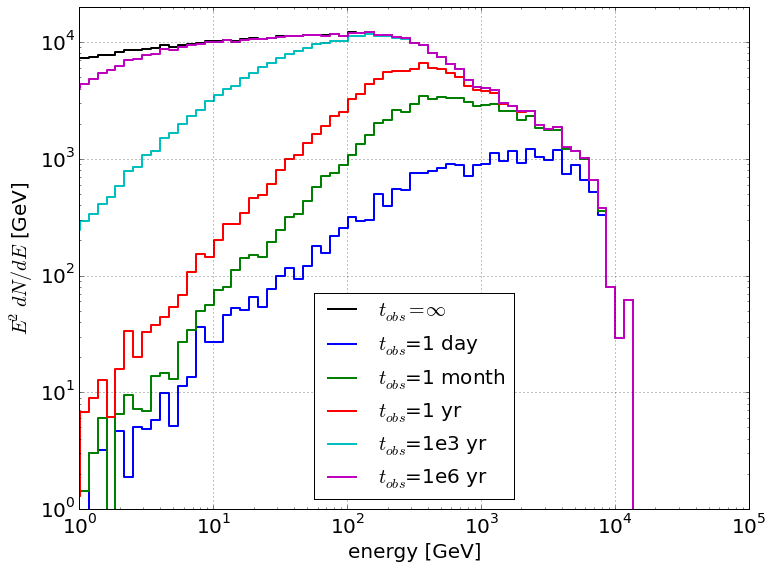

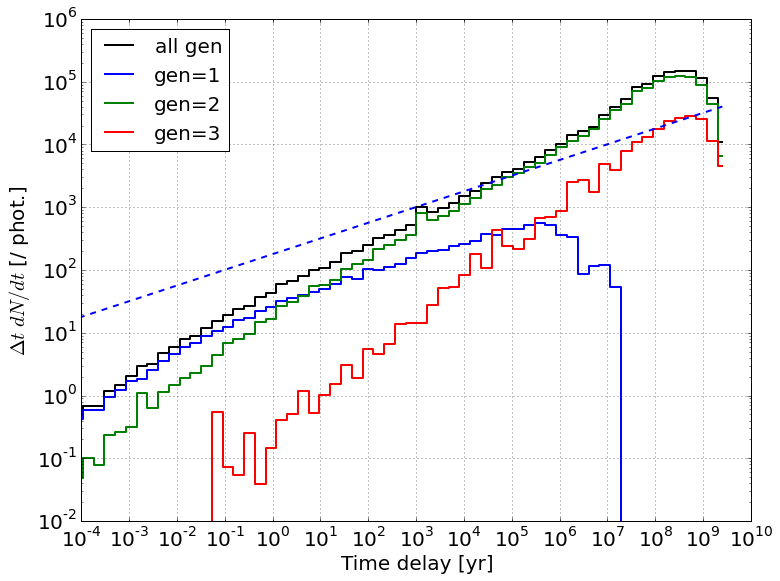

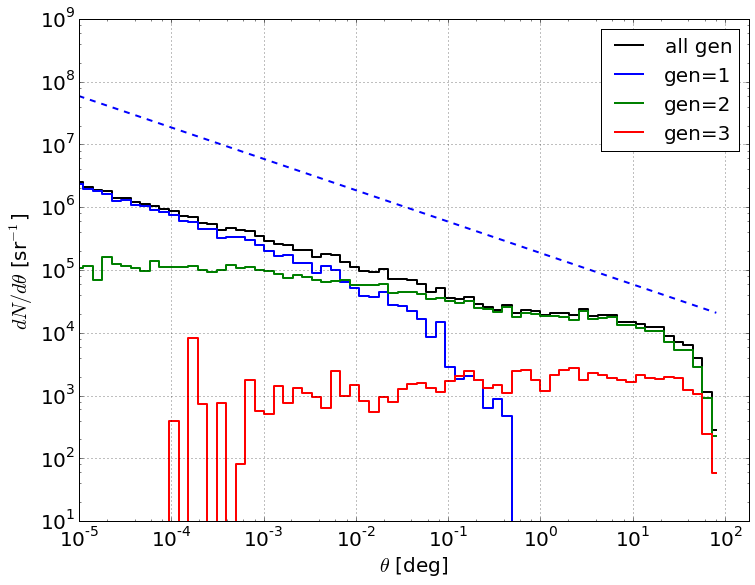

In [4]:
%matplotlib inline
import modules.distribution
simu = ["simple case EGMF=3e-16G"]
modules.distribution.drawSpectrum(simu,plot="generation",yrange=[1e0,2e4],plot_analytic=True,plot_other_codes=True)
modules.distribution.drawSpectrum(["simple case EGMF=3e-16G"],yrange=[1e0,2e4],plot="obs time")
modules.distribution.drawTiming(simu,plot="generation",plot_analytic=True)
modules.distribution.drawArrivalAngle(simu,plot="generation",plot_analytic=True)

## Observables space

case: z=0.13, E=100TeV, B $\in [10^{-15}G,10^{-16}G,10^{-17}G,10^{-18}G]$, EBL: Franceschini

break dans la courbe "angle vs E"

si lambda_B "petit" (ici =100kpc) 
$$\theta \propto \delta \propto x/R_L \propto E_{ic}^{-1}$$
$$\theta \propto \delta \propto \sqrt{x \lambda_B}/R_L \propto E_{ic}^{-3/4}$$

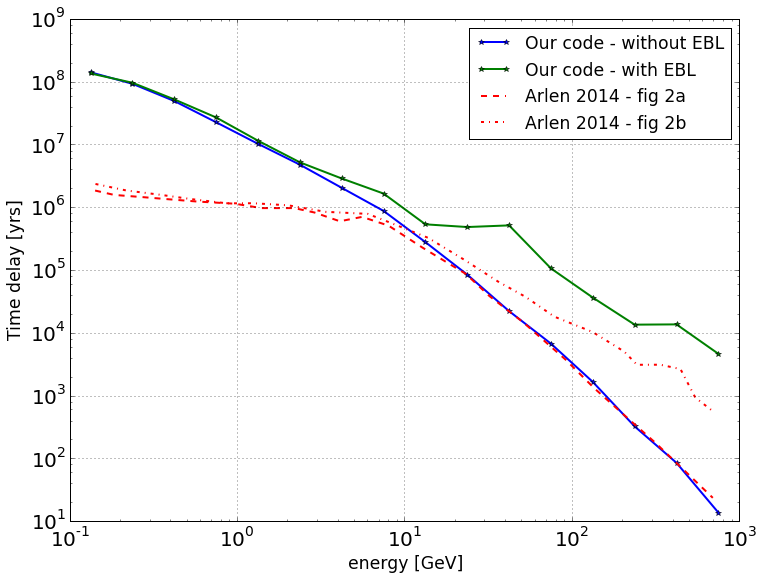

In [5]:
%matplotlib inline
import modules.observables
modules.observables.drawDelays_vs_energy(["Our code - without EBL","Our code - with EBL"],psf=10,plot_others_codes=True)

theta range:  [ 1.00295694118e-05 ,  86.259678328 ] (degre)
delay range:  [ 0.000169920125411 ,  4044864824.91 ] (yr)
energy range: [ 

modules/observables.py:122: RuntimeWarning: divide by zero encountered in log10
  im1 = ax0.pcolormesh(10**xedges,10**yedges,log10(H),cmap=colormap.YlOrBr)
modules/observables.py:126: RuntimeWarning: divide by zero encountered in log10
  im2 = ax2.pcolormesh(10**xedges,10**yedges,log10(H),cmap=colormap.YlOrBr)


0.00100008175836 ,  7709.7252537 ] (GeV)
weight range: [ 4.32541393146e-08 ,  0.15540537733 ]


modules/observables.py:130: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.pcolormesh(10**xedges,10**yedges,log10(H),cmap=colormap.YlOrBr)


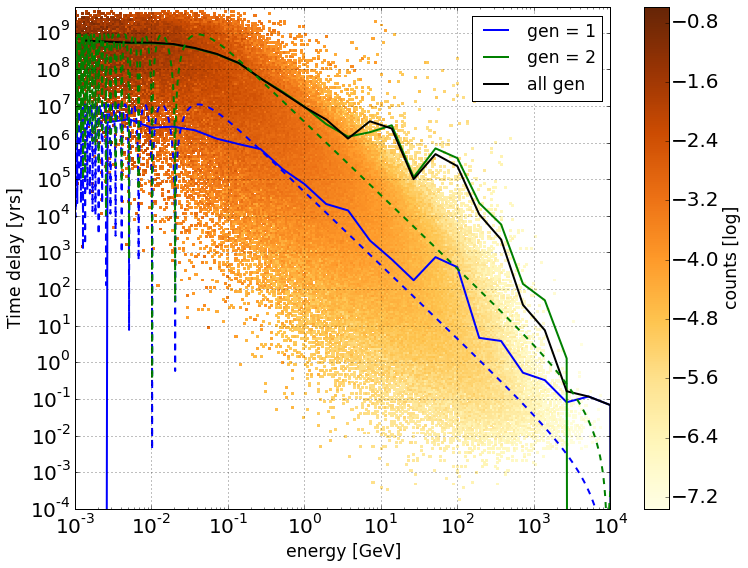

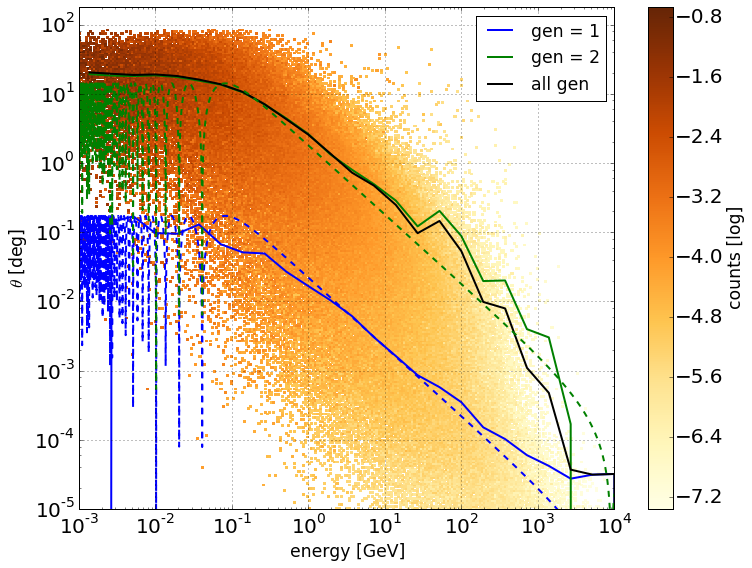

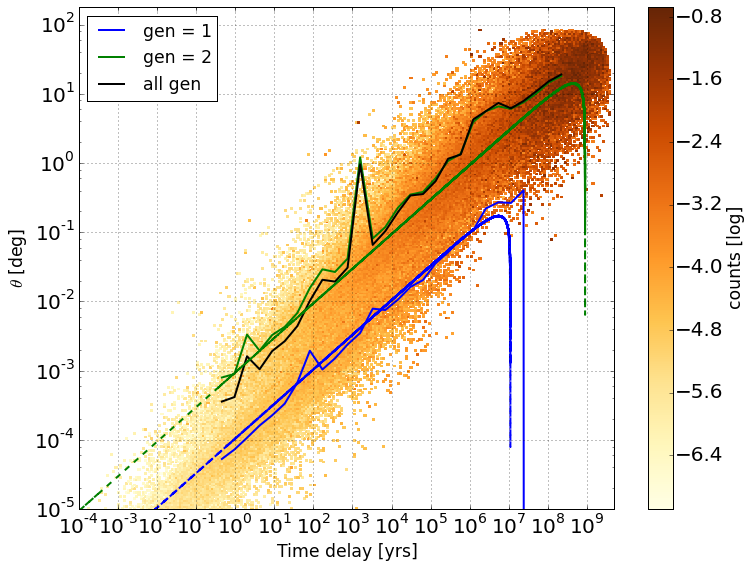

In [1]:
%matplotlib inline
import modules.observables
modules.observables.drawObservables("simple case/EGMF=3e-16G",Nb=28,one_figure=False)
#modules.observables.drawObservables("simple case/EGMF=1e-15G",Nb=28,plot_others_codes=True)
#modules.observables.drawObservables("simple case/approx - all",plot_generation_density=True)
#modules.observables.drawObservables("simple case/approx - no lambda_gg",plot_generation_density=True)
#modules.observables.drawObservables("simple case/approx - no lambda_ic",plot_generation_density=True)
#modules.observables.drawObservables("simple case/approx - no Ee",plot_generation_density=True)
#modules.observables.drawObservables("simple case/approx - no Eic",plot_generation_density=True)
#modules.observables.drawObservables("simple case/approx - no motionless leptons",plot_generation_density=True)
#modules.observables.drawObservables("simple case/approx - non uniform EGMF",plot_generation_density=True)

#### $\theta_{arrival}$ versus $\theta_{pos}$

$$
   \theta_{arrival} = \arctan \left( \frac{\sin\theta_{pos}}{D_s/\lambda_{\gamma\gamma} - \cos \theta_{pos}} \right)
$$

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:43: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:53: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:57: RuntimeWarning: divide by zero encountered in log10


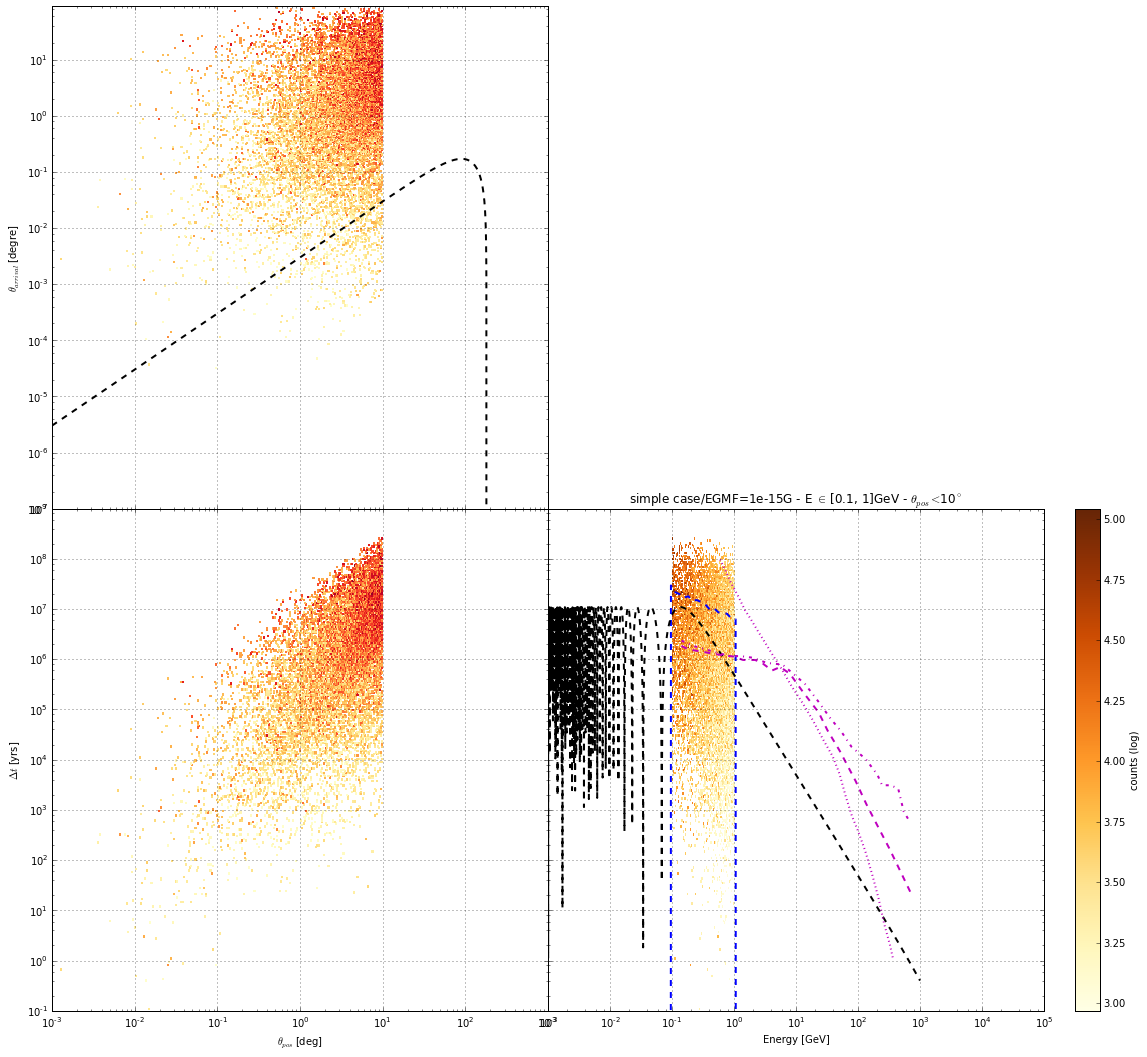

In [2]:
%matplotlib inline
import matplotlib.cm as colormap
from matplotlib.pyplot     import figure, show, suptitle, setp
from matplotlib.gridspec   import GridSpec
from matplotlib.colors     import LogNorm
from numpy                 import rot90, flipud, ma, histogram2d, log10, arctan, sin, cos, arange, logspace, loadtxt
from modules.read          import ReadResults, ReadProfile
from modules.analytic      import lambda_gg, Analytic_observables_vs_energy, degre, yr 
from modules.observables   import observables_vs_energy

def theta_arr(pos,fileId):
   Esource,distSource,zs=ReadProfile(fileId,[1,2,3]) #GeV #Mpc 
   lgg = lambda_gg(Esource*1e3,zs)[0]
   tau = distSource / lgg
   return arctan(sin(pos)/(tau-cos(pos)))*degre

   
def DrawPosition_E_delay(fileId,gen_selec=0,Eband=[1e-3,1e5],psf=180,nbBins=300):
   fig = figure(figsize=(20,18))
   gs = GridSpec(2, 2, width_ratios=[4,5],height_ratios=[1,1])      
   fig.subplots_adjust(wspace=0,hspace=0)
   ax0 = fig.add_subplot(gs[0])
   ax1 = fig.add_subplot(gs[2],sharex=ax0)
   ax2 = fig.add_subplot(gs[3],sharey=ax1) 
   
   gen, weight, energy, delay, pos, arrival = ReadResults("Simulations/"+fileId,cols=[0,1,2,3,4,8])
   if gen_selec != 0:
      cond = (delay>0) & (arrival>0) & (gen  == gen_selec) & (energy<Eband[1]) & (energy>Eband[0]) & (pos*degre<psf)

   else:
      cond = (delay>0) & (arrival>0) & (energy<Eband[1]) & (energy>Eband[0]) & (pos*degre<psf)
   
   delay = delay[cond]/yr
   energy = energy[cond]
   pos = pos[cond]*degre
   weight = weight[cond]
   gen = gen[cond]
   arrival = arrival[cond]*degre
   
   H, xedges, yedges = histogram2d(log10(pos),log10(arrival),bins=nbBins,weights=weight)
   H = flipud(rot90(ma.masked_where(H==0,H)))
   im0 = ax0.pcolormesh(10**xedges,10**yedges,log10(H),cmap=colormap.YlOrRd)
   
   n = 5000 
   mini = 1e-5
   maxi = 180/degre
   th = mini*(maxi/mini)**(arange(n)/(n-1.))
   ax0.plot(th*degre,theta_arr(th,"Simulations/"+fileId),'--k',linewidth=2)
   
   H, xedges, yedges = histogram2d(log10(pos),log10(delay),bins=nbBins,weights=weight)
   H = flipud(rot90(ma.masked_where(H==0,H)))
   im1 = ax1.pcolormesh(10**xedges,10**yedges,log10(H),cmap=colormap.YlOrRd)

   H, xedges, yedges = histogram2d(log10(energy),log10(delay),bins=nbBins,weights=weight)
   H = flipud(rot90(ma.masked_where(H==0,H)))
   im2 = ax2.pcolormesh(10**xedges,10**yedges,log10(H),cmap=colormap.YlOrBr)
   cbar=fig.colorbar(im2, ax=ax2)
   cbar.ax.set_ylabel("counts (log)")
   
   E,theta,dt = observables_vs_energy(energy,pos,delay,weight)
   ax2.plot(E,dt,'--b',linewidth=2)
   
   n = 5000 
   mini = 1e-3
   maxi = 1e3
   Egamma = mini*(maxi/mini)**(arange(n)/(n-1.))
   ax2.plot(Egamma,Analytic_observables_vs_energy(Egamma, "Simulations/"+fileId)[1]/yr,'--k',linewidth=2)
   
   # Results from Arlen 2014 - fig. 2a, 2b
   # =====================================
   #   - binning in energy : log, 16 bins between 1e-1 et 1e3 GeV
   #   - PSF = 10 deg
   data = loadtxt("Simulations/"+fileId+'/Arlen2014-fig2a.csv', delimiter=',')
   ax2.plot(data[:,0],data[:,1],color="m",linestyle='--',linewidth=2,label="Arlen 2014 - no EBL")
   data = loadtxt("Simulations/"+fileId+'/Arlen2014-fig2b.csv', delimiter=',')
   ax2.plot(data[:,0],data[:,1],color="m",linestyle='-.',linewidth=2,label="Arlen 2014 - EBL")
   # Results from Taylor 2011 - fig. 2
   # =================================
   data = loadtxt("Simulations/"+fileId+'/Taylor2011-fig2.csv', delimiter=',')
   ax2.plot(data[:,0]*1e-9,data[:,1],color="m",linestyle=':',linewidth=2,label="Taylor 2011")  
   
   ax2.set_title(fileId+" - E $\\in$ "+str(Eband)+"GeV - $\\theta_{pos} <$"+str(psf)+"$^\\circ$") 
 
   ax0.set_xscale('log')
   ax0.set_yscale('log')
   ax0.set_ylim([1e-7,90])
   ax0.grid(b=True,which='major')
   ax0.set_ylabel("$\\theta_{arrival}$ [degre]") 
   setp(ax0.get_xticklabels(), visible=False)

   ax1.set_xscale('log')
   ax1.set_yscale('log')
   #ax1.set_xlim([1e-5,2e2])
   ax1.grid(b=True,which='major')
   ax1.set_xlabel("$\\theta_{pos}$ [deg]")
   ax1.set_ylabel("$\\Delta t$ [yrs]")   
       
   ax2.set_xscale('log')
   ax2.set_yscale('log')
   #ax2.set_xlim([0.8e-3,5e4])
   ax2.grid(b=True,which='major')
   ax2.set_xlabel("Energy [GeV]")
   setp(ax2.get_yticklabels(), visible=False)

   show()
   
#DrawPosition_E_delay("simple case/approx - no motionless leptons",gen_selec=2)
#DrawPosition_E_delay("simple case/approx - no motionless leptons",Eband=[0.1,1])
#DrawPosition_E_delay("simple case/approx - no motionless leptons",psf=10)
#DrawPosition_E_delay("simple case/no approx",gen_selec=2)
#DrawPosition_E_delay("simple case/no approx",psf=10)
#DrawPosition_E_delay("simple case/no approx",Eband=[0.1,1],gen_selec=4)
DrawPosition_E_delay("simple case/EGMF=1e-15G",Eband=[0.1,1],psf=10)

#### time delay / energy band

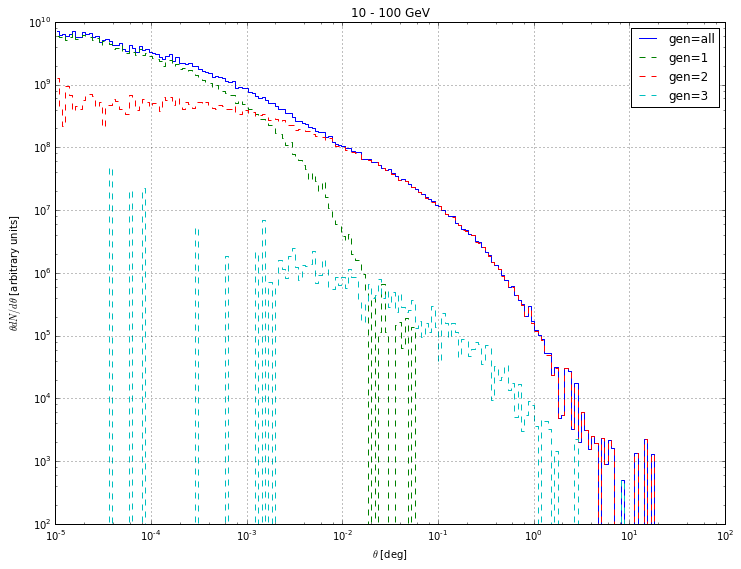

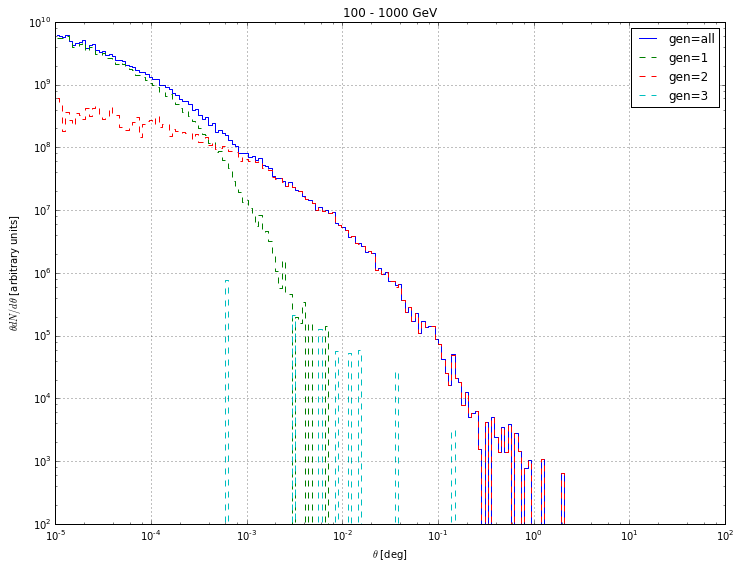

In [4]:
%matplotlib inline
from modules.arrival_angle import arrivalAngle
from modules.read import ReadResults
from modules.analytic import degre
from numpy import arange, pi
from matplotlib.pyplot import figure, show

Emin = [ 10, 100] #GeV
Emax = [100,1000] #GeV

nbBins = 200
theta_min = 1e-5
theta_max = 90

figs = [figure(figsize=(12,9)),figure(figsize=(12,9))]


gen,weight,energy,theta_arrival = ReadResults("Simulations/simple case z=0.13",[0,1,2,8])
theta_arrival *= degre

for n in arange(0,2,1):
   ax = figs[n].add_subplot(111)
   cond= (energy>Emin[n]) & (energy<Emax[n])
   theta,dndtheta = arrivalAngle(theta_arrival[cond],weight[cond],nbBins,theta_range=[theta_min,theta_max])
   ax.plot(theta,dndtheta,drawstyle='steps-mid',linestyle='-',label="gen=all")
   cond= (energy>Emin[n]) & (energy<Emax[n]) & (gen == 2)
   theta,dndtheta = arrivalAngle(theta_arrival[cond],weight[cond],nbBins,theta_range=[theta_min,theta_max])
   ax.plot(theta,dndtheta,drawstyle='steps-mid',linestyle='--',label="gen=1")
   cond= (energy>Emin[n]) & (energy<Emax[n]) & (gen == 4)
   theta,dndtheta = arrivalAngle(theta_arrival[cond],weight[cond],nbBins,theta_range=[theta_min,theta_max])
   ax.plot(theta,dndtheta,drawstyle='steps-mid',linestyle='--',label="gen=2")
   cond= (energy>Emin[n]) & (energy<Emax[n]) & (gen == 6)
   theta,dndtheta = arrivalAngle(theta_arrival[cond],weight[cond],nbBins,theta_range=[theta_min,theta_max])
   ax.plot(theta,dndtheta,drawstyle='steps-mid',linestyle='--',label="gen=3")
   
   ax.set_xscale('log')
   ax.set_yscale('log')
   ax.grid(b=True,which='major')
   ax.legend(loc="best")
   ax.set_xlabel("$\\theta$ [deg]")
   ax.set_ylabel("$\\theta dN/d\\theta$ [arbitrary units]")
   ax.set_title("%1.0f - %1.0f GeV"%(Emin[n],Emax[n]))
   
show()

### Impact PSF according Taylor 2011

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10


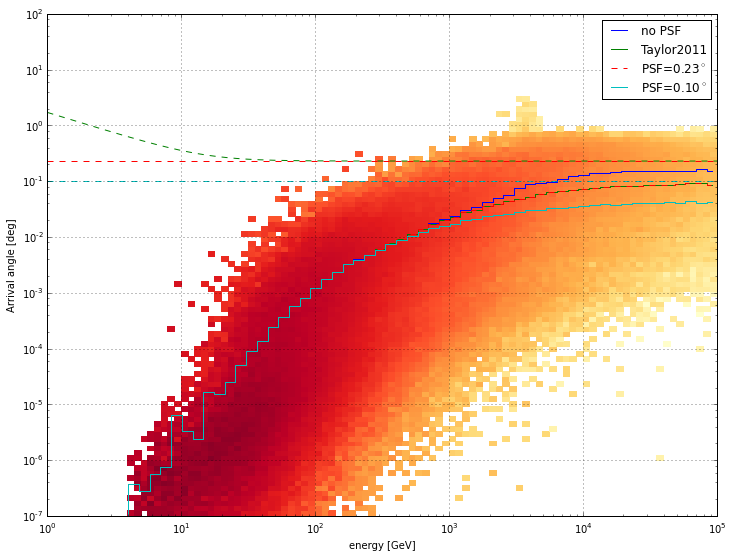

In [5]:
%matplotlib inline
import matplotlib.cm as colormap
from matplotlib.pyplot   import figure, show
from numpy               import loadtxt, arange, rot90, flipud, histogram2d, log10, ma, logspace
from modules.read        import ReadResults
from modules.observables import theta_vs_energy

ax = figure(figsize=(12,9)).add_subplot(111)
nbBins = 100
theta_range = [1e-7,90]
Erange = [1,1e5]
nE = 1000
E = Erange[0]*(Erange[1]/Erange[0])**(arange(nE)/(nE-1.))

def PSF_Taylor2011(E): # E en GeV -> PSF en degré
   return 1.7 * E**(-0.74) * (1+(E/15)**2)**0.37

energy,weight,theta_arrival=ReadResults("Simulations/simple case - z=0.13 - EGMF=15", [1,2,8])

H, xedges, yedges = histogram2d(log10(energy),log10(theta_arrival),bins=nbBins,range=[log10(Erange),log10(theta_range)],weights=weight)
H = ma.masked_where(H==0,H)
H = rot90(H)
H = flipud(H)
im = ax.pcolormesh(10**xedges,10**yedges,log10(H),cmap=colormap.YlOrRd) 

ener,angle = theta_vs_energy(theta_arrival,energy,nbBins=nbBins)
ax.plot(ener,angle,linestyle="steps-mid",label="no PSF")

cond = (theta_arrival<PSF_Taylor2011(energy))
ener,angle = theta_vs_energy(theta_arrival[cond],energy[cond],nbBins=nbBins)
p=ax.plot(ener,angle,drawstyle="steps-mid",label="Taylor2011")
ax.plot(E,PSF_Taylor2011(E),color=p[0].get_color(),linestyle="--")

PSF = min(PSF_Taylor2011(E))
cond = (theta_arrival<PSF)
ener,angle = theta_vs_energy(theta_arrival[cond],energy[cond],nbBins=nbBins)
p=ax.plot(ener,angle,drawstyle="steps-mid",linestyle="--",label="PSF=%1.2f$^\circ$"%PSF)
ax.plot(E,PSF*E**0,color=p[0].get_color(),linestyle="--")

PSF=0.1
cond = (theta_arrival<PSF)
ener,angle = theta_vs_energy(theta_arrival[cond],energy[cond],nbBins=nbBins)
p=ax.plot(ener,angle,linestyle="steps-mid",label="PSF=%1.2f$^\circ$"%PSF)
ax.plot(E,PSF*E**0,color=p[0].get_color(),linestyle="--")

ax.grid(b=True,which='major')
ax.legend(loc="best")   
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("energy [GeV]")
ax.set_ylabel("Arrival angle [deg]")

show()

### Problème z=0.0308 versus autre redshift

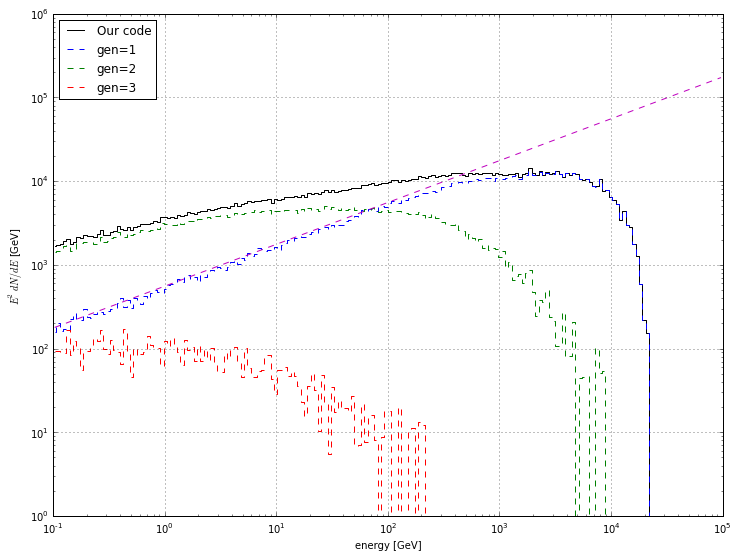

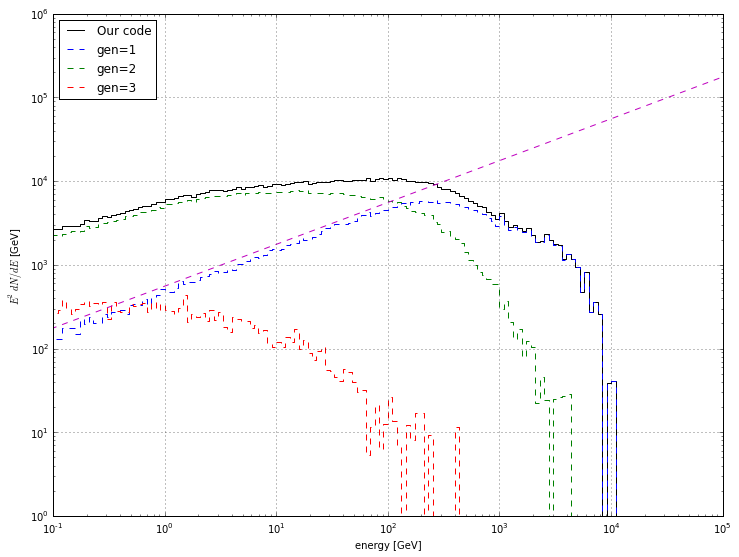

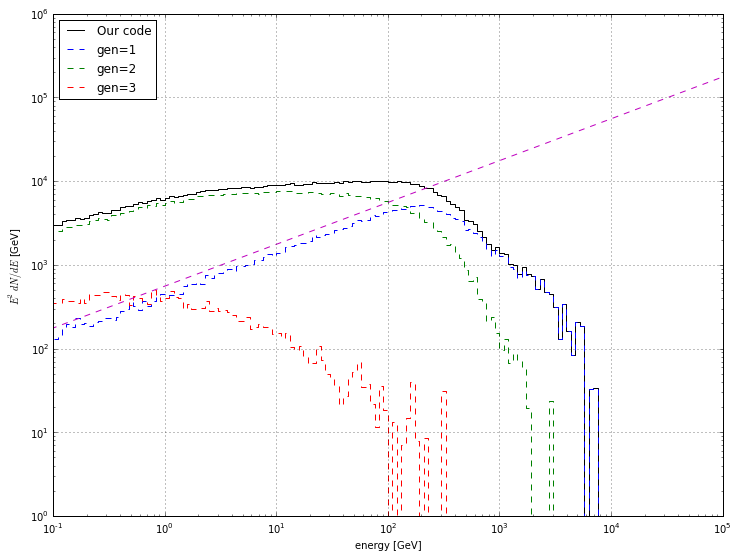

In [1]:
%matplotlib inline
import modules.spectrum

modules.spectrum.drawSpectrum(["simple case"]           ,plot="generation",plot_analytic=True)
modules.spectrum.drawSpectrum(["compare Taylor EGMF=15"],plot="generation",plot_analytic=True)
modules.spectrum.drawSpectrum(["simple case z=0.2"]     ,plot="generation",plot_analytic=True)

## Impact tirage aléatoire du champ magnétique sur les résultats

/usr/lib64/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


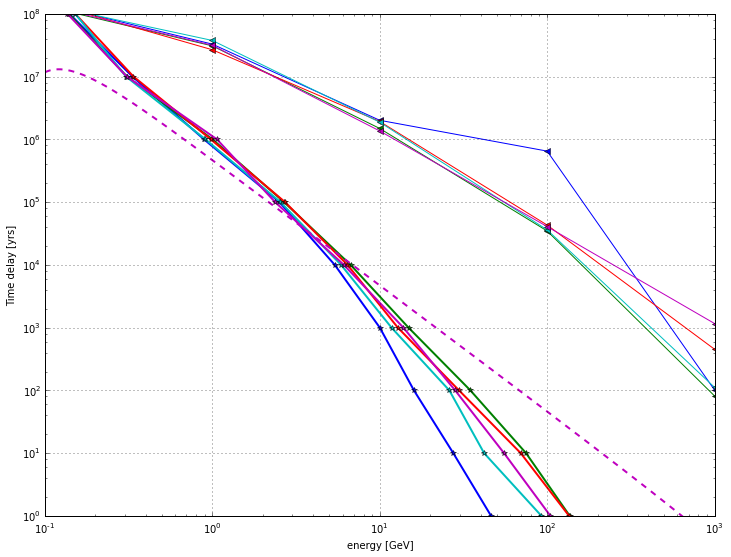

In [6]:
%matplotlib inline
from numpy             import loadtxt, arange, histogram, logspace, log10, rot90, flipud, histogram2d, log10, ma
from numpy             import sin, cos, arcsin
import matplotlib.cm as colormap
from matplotlib.pyplot import figure, show, gca, legend
from modules.read      import ReadResults, ReadProfile
from modules.analytic  import yr, degre, Mpc, c, Dic, RL, Ee

def PSF_Taylor2011(E): # E en GeV -> PSF en degré
   return 1.7 * E**(-0.74) * (1+(E/15)**2)**0.37

def delay_vs_energy(time,energy,weight,time_range=[10**-0.5,10**8.5],nbBins=9): # nbBins=10 <=> Taylor 2011
   bins=logspace(log10(time_range[0]),log10(time_range[1]),nbBins+1)
   ener,par = histogram(time,bins,weights=weight*energy)
   nb,  par = histogram(time,bins,weights=weight)
   parcenter = (bins[1:nbBins+1]*bins[0:nbBins])**(0.5) # log scale
   return ener/nb, parcenter

def delay_vs_energy2(time,energy,weight,energy_range=[10**-1.5,10**3.5],nbBins=5): # nbBins=14 <=> Arlen 2014
   bins=logspace(log10(energy_range[0]),log10(energy_range[1]),nbBins+1)
   enercenter = (bins[1:nbBins+1]*bins[0:nbBins])**0.5
   dt, ener = histogram(energy,bins,weights=weight*time)
   nb, ener = histogram(energy,bins,weights=weight)
   return enercenter, dt/nb

def Analytic_delay_vs_energy(Egamma):
   B=1e-15 #G
   Eg0=1e5 #GeV
   Ee0=Eg0/2 #GeV
   zs=0.13
   Ds=557 #Mpc
   lgg=2 #Mpc
   RL0=RL(Ee0,B)
   Dic0=Dic(Ee0,zs)
   E_e = Ee(Egamma,zs)
   delta_ic = Dic0/(2*RL0)*((Ee0/E_e)**2 -1)
   theta = arcsin(lgg/Ds*sin(delta_ic))
   c_delta_t = (lgg*(1-cos(delta_ic)) - Ds*(1-cos(theta)))
   return c_delta_t *Mpc/c 

ax1 = figure(figsize=(12,9)).add_subplot(111)
nbBins = 100

for fileId in ["test1","test2","test3","test4","test5"]:
   gen, weight, energy, delay, arrival_angle = ReadResults("Simulations/"+fileId,cols=[0,1,2,3,8])
   cond = (energy>10**-1.5) & (energy<10**3.5) #& (gen==2)
   delay = delay[cond]/yr
   arrival_angle = arrival_angle[cond]*degre
   energy = energy[cond]
   weight = weight[cond]

   ener,dt_no_PSF = delay_vs_energy(delay,energy,weight)
   p01, = ax1.plot(ener,dt_no_PSF,linewidth=2,marker='*')   
   
   cond = arrival_angle < 10  # PSF_Taylor2011(energy) 
   ener,dt_no_PSF = delay_vs_energy2(delay[cond],energy[cond],weight[cond])
   p02, =ax1.plot(ener,dt_no_PSF,color=p01.get_color(),marker='<') 
      
nth = 5000
thmin = 0.1
thmax = 1e4
E = thmin*(thmax/thmin)**(arange(nth)/(nth-1.))
delay_fit = Analytic_delay_vs_energy(E)
ax1.plot(E,delay_fit/yr,color="m",linestyle='--',linewidth=2)

ax1.grid(b=True,which='major')  
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1,1e8])
ax1.set_xlim([1e-1,1e3])
ax1.set_xlabel("energy [GeV]")
ax1.set_ylabel("Time delay [yrs]") 
ax1.legend(loc="best")

show()

156.69271477444738